In [296]:
import pandas as pd

result=pd.read_csv("D:\Dataset\play_dataset.csv")
result.fillna(result.mean(),inplace=True)

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\2170434203.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.fillna(result.mean(),inplace=True)


In [297]:
dict={}

for l in list(set(result['name'])):
    name_1_result=[]
    task=['A','B','C']
    result_1=result[result['name']==l]
    for i in task:
        save=[]
        result_1_A=result_1[result['task']==i]
        for j in range(1,16):
            save.append(result_1_A[result['channel']==j]['avg'].values[0])
        name_1_result.append(save)
    for k in range(0,15):
        name_1_result[1][k]=max(name_1_result[1][k],name_1_result[2][k])
    name_1_result.remove(name_1_result[2])
    dict[l]=name_1_result

print(dict)

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1066367994.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_1_A=result_1[result['task']==i]
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1066367994.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  save.append(result_1_A[result['channel']==j]['avg'].values[0])


{'name_7': [[0.001868204, -5.14818e-06, 5.36837e-05, -0.000377289, -0.000195331, 0.000209063, 0.000316219, 0.000504248, 0.000142088, 0.001509957, 0.000978243, 0.000102867, 0.001259027, 0.000534076, -8.59051e-05], [-0.000230635, 0.000646521, -0.000287642, 0.000173313, -5.91027e-05, 0.000568286, 0.000397191, 0.000389567, 0.000581305, 0.001184386, 0.000484937, 0.000458685, 0.001122059, 0.000395396, -0.000165748]], 'name_15': [[-5.1935e-05, 0.001379471, -0.000803449, -0.000715676, -0.000282227, -0.000619243, -0.000663363, 0.000189792, -0.000214545, -0.000222288, 0.000139361, -0.000842737, 0.000837635, 0.00119727, 0.000926989], [0.000489156, 0.001933263, 0.000508342, 0.000250024, 0.001392846, 0.000515135, 0.000840296, 0.001183369, 0.000483817, 0.000898447, 0.002092016, 0.001017269, 0.00119718, 0.000784805, 0.001294849]], 'name_5': [[0.001811682, 0.001604148, 0.001451653, 0.001463191, 0.001895104, 0.002478603, 0.001340824, 0.001418582, 0.002134382, 0.001879177, 0.002072456, 0.001340736, 0.00

In [298]:
A=[]
MBC=[]
for i in range(1,16):
    save_A=[]
    save_BC=[]
    for j in list(dict.keys()):
        save_A.append(dict[j][0][i-1])
        save_BC.append(dict[j][1][i-1])
    A.append(save_A)
    MBC.append(save_BC)

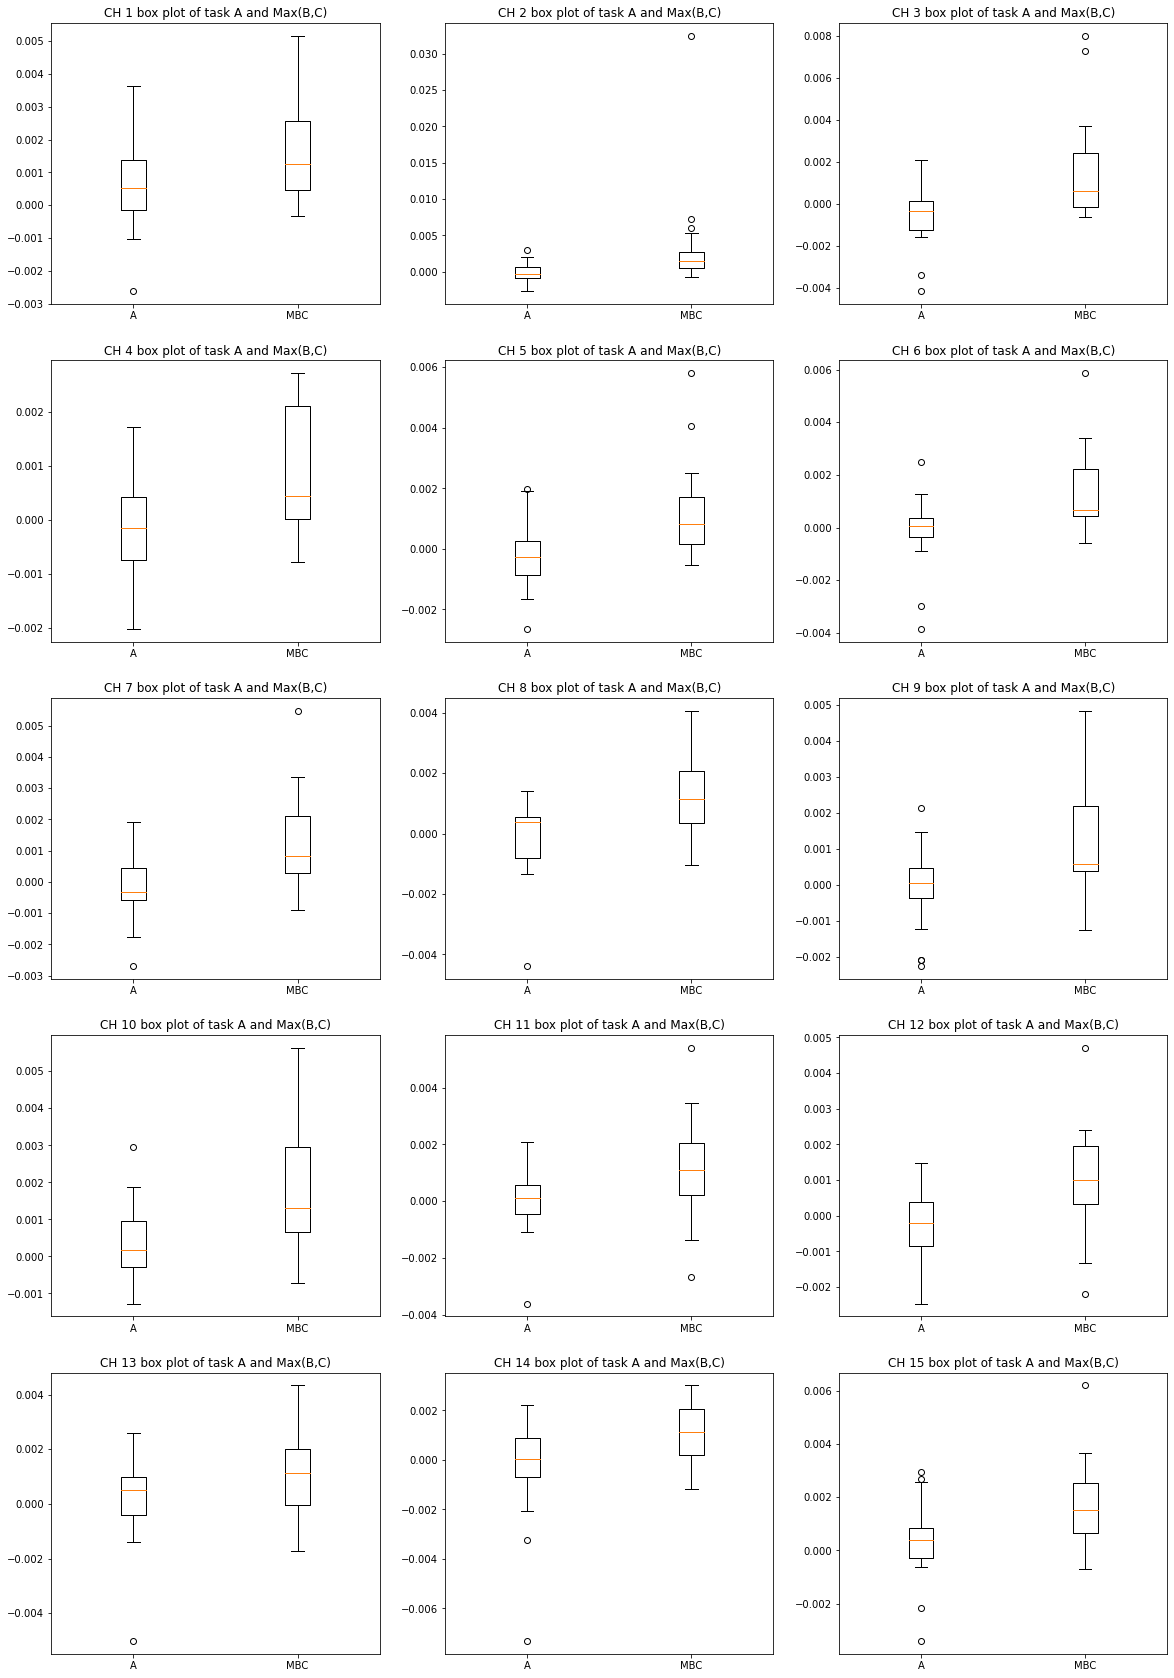

In [304]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(2)
task_list=['A','MBC']
plt.figure(figsize=(20, 30))
plt.title(" 1~15")
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.boxplot([A[i-1],MBC[i-1]])
    plt.xticks([1,2], task_list)
    plt.title('CH '+str(i)+' box plot of task A and Max(B,C)')
plt.show()

In [310]:
import scipy.stats
for i in range(1,16):
    print('\n')
    print("CH "+str(i)+" paired t-test result")
    print(scipy.stats.ttest_rel(A[i-1],MBC[i-1],alternative='less'))



CH 1 paired t-test result
Ttest_relResult(statistic=-2.657476241992295, pvalue=0.008016724231537337)


CH 2 paired t-test result
Ttest_relResult(statistic=-2.217458257134294, pvalue=0.019850528112200085)


CH 3 paired t-test result
Ttest_relResult(statistic=-3.691039859148653, pvalue=0.0008358434315888168)


CH 4 paired t-test result
Ttest_relResult(statistic=-3.169434582602296, pvalue=0.0026535671392378096)


CH 5 paired t-test result
Ttest_relResult(statistic=-3.9741574155134796, pvalue=0.00044479513685419334)


CH 6 paired t-test result
Ttest_relResult(statistic=-3.7382889658159173, pvalue=0.000752347289318361)


CH 7 paired t-test result
Ttest_relResult(statistic=-3.882987137088165, pvalue=0.0005449833147688251)


CH 8 paired t-test result
Ttest_relResult(statistic=-3.7036027696655, pvalue=0.0008127816167010948)


CH 9 paired t-test result
Ttest_relResult(statistic=-3.8081135817036187, pvalue=0.0006439461649015195)


CH 10 paired t-test result
Ttest_relResult(statistic=-3.3782875